In [1]:
library(tidyverse)
library(feather)
library(plotly)
library(caret)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



In [2]:
transactions <- feather::read_feather('..\\Data\\Datathon_2017\\Transactions_Frame')

Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"

In [3]:
ATC_Lookup <- feather::read_feather('..\\Data\\Datathon_2017\\ATC_Lookup')
ChronicIllness_LookUp <- feather::read_feather('..\\Data\\Datathon_2017\\ChronicIllness_LookUp')
Drug_LookUp <- feather::read_feather('..\\Data\\Datathon_2017\\Drug_LookUp')
patients <- feather::read_feather('..\\Data\\Datathon_2017\\patients')
stores <- feather::read_feather('..\\Data\\Datathon_2017\\stores')

Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"

In [4]:
patient_ids <- transactions %>% select(Patient_ID) %>% unique
sample_patient_id_ix <- sample(1:nrow(patient_ids))[1:(0.01*nrow(patient_ids))]
sample_patient_ids <- patient_ids[sample_patient_id_ix,]

In [5]:
sample_transactions <- transactions %>% filter(Patient_ID %in% sample_patient_ids$Patient_ID)

In [6]:
nrow(sample_transactions)

[1] 124037

In [21]:
sample_transactions %>% head(1)

Patient_ID,Store_ID,Prescriber_ID,Drug_ID,SourceSystem_Code,Prescription_Week,Dispense_Week,Drug_Code,NHS_Code,IsDeferredScript,Script_Qty,Dispensed_Qty,MaxDispense_Qty,PatientPrice_Amt,WholeSalePrice_Amt,GovernmentReclaim_Amt,RepeatsTotal_Qty,RepeatsLeft_Qty,StreamlinedApproval_Code
7,1427,25168,3423,F,2011-07-10,2011-08-07,FLOM2,4070F,0,30,2,NA,50,46.21,0,6,4,NA


In [20]:
Drug_LookUp %>% head(1)

MasterProductID,MasterProductCode,MasterProductFullName,BrandName,FormCode,StrengthCode,PackSizeNumber,GenericIngredientName,EthicalSubCategoryName,EthicalCategoryName,ManufacturerCode,ManufacturerName,ManufacturerGroupID,ManufacturerGroupCode,ChemistListPrice,ATCLevel5Code,ATCLevel4Code,ATCLevel3Code,ATCLevel2Code,ATCLevel1Code
7777,SCH4,SQUIBB HC OINT 1% 50G 1,SQUIBB HC,OINT,1% 50G,1,HYDROCORTISONE ACETATE,NON PBS Substitutable,ETHICAL NON PBS,BQ,BRISTOL-MYERS SQUIBB AUST,43,BMS,1.8609,A07EA,A07EA,A07E,A07,A


In [9]:
Drug_LookUp %>% filter(MasterProductID == 9417)

MasterProductID,MasterProductCode,MasterProductFullName,BrandName,FormCode,StrengthCode,PackSizeNumber,GenericIngredientName,EthicalSubCategoryName,EthicalCategoryName,ManufacturerCode,ManufacturerName,ManufacturerGroupID,ManufacturerGroupCode,ChemistListPrice,ATCLevel5Code,ATCLevel4Code,ATCLevel3Code,ATCLevel2Code,ATCLevel1Code
9417,ZOLO2,ZOLOFT TAB 50MG (AS HCL) 30 30,ZOLOFT,TAB,50MG (AS HCL),30,SERTRALINE,PBS Substitutable,ETHICAL PBS,PF,PFIZER AUSTRALIA PTY LTD,192,PFIZER,7.27,N06AB06,N06AB,N06A,N06,N


In [19]:
ATC_Lookup %>% head(1)

ATCLevel1Code,ATCLevel1Name,ATCLevel2Code,ATCLevel2Name,ATCLevel3Code,ATCLevel3Name,ATCLevel4Code,ATCLevel4Name,ATCLevel5Code,ATCLevel5Name
A,ALIMENTARY TRACT AND METABOLISM,A01,STOMATOLOGICAL PREPARATIONS,A01A,STOMATOLOGICAL PREPARATIONS,A01AB,ANTIINFECTIVES AND ANTISEPTICS FOR LOCAL ORAL TREATMENT,A01AB03,CHLORHEXIDINE


In [18]:
#ATC_Lookup %>% filter(ATCLevel5Code == 'N06AB06')

In [17]:
ChronicIllness_LookUp %>% head(1)

ChronicIllness,MasterProductID,MasterProductFullName
Diabetes,141,ACTOS TAB 30MG (AS HCL) 28


In [16]:
patients %>% head(1)

Patient_ID,gender,year_of_birth,postcode
1,F,1900,2516


In [15]:
stores %>% head(1)

Store_ID,StateCode,postcode,IsBannerGroup
1,VIC,3558,0


In [23]:
postcodes <- read.csv('..\\Data\\Datathon_2017\\Australian_Post_Codes_Lat_Lon.csv')

In [25]:
postcodes %>% head(1)

postcode,suburb,state,dc,type,lat,lon
200,AUSTRALIAN NATIONAL UNIVERSITY,ACT,AUSTRALIAN NATIONAL UNI LPO,Post Office Boxes,-35.27727,149.1171


postcode,lat,long
0,NA,NA
200,-35.27727,149.1171
221,-35.20137,149.0951
800,-12.80103,130.9558
801,-12.80103,130.9558
804,-12.43218,130.8433
810,-12.37697,130.8735
811,-12.37660,130.8505
812,-12.39013,130.8998
814,-12.38257,130.8539


In [40]:
sample_transactions %>% 
    left_join(patients, by='Patient_ID') %>% 
    left_join(postcodes %>% group_by(postcode) %>%
                summarise(lat = mean(lat),
                  long = mean(lon))
        , by='postcode') %>% 
    left_join(ChronicIllness_LookUp, by = c('Drug_ID','MasterProductID'))
 filter( long > 140, long < 160, lat < -35 ) %>% head(10)

ERROR: Error in eval(substitute(expr), envir, enclos): 'Drug_ID' column not found in lhs, cannot join


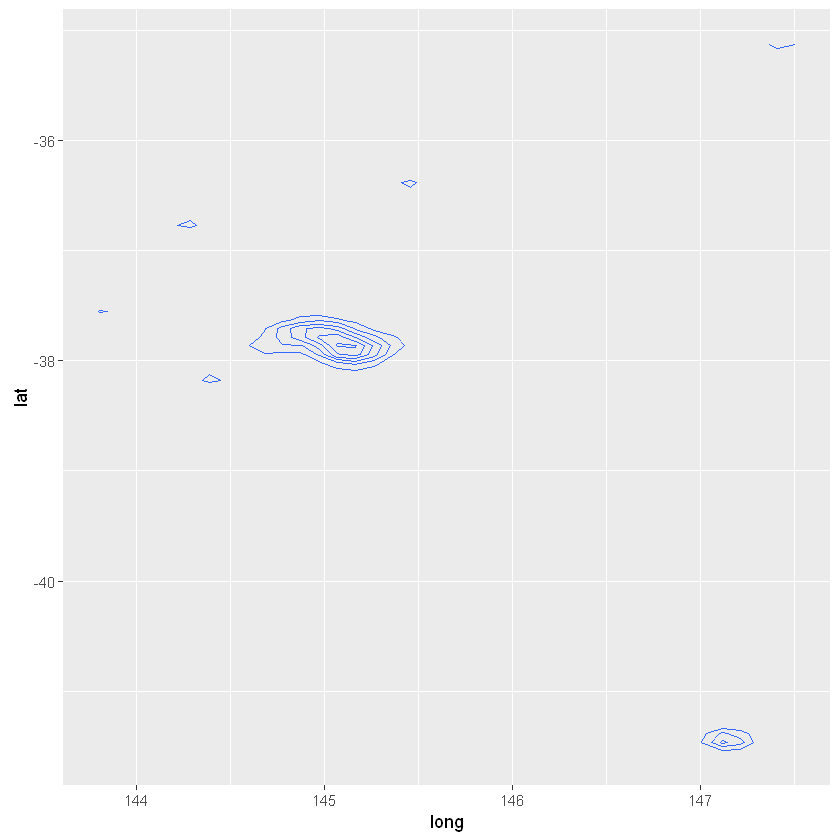

In [38]:
sample_transactions %>% 
    left_join(patients, by='Patient_ID') %>% 
    left_join(postcodes %>% group_by(postcode) %>%
                summarise(lat = mean(lat),
                  long = mean(lon))
        , by='postcode') %>% 
 filter( long > 140, long < 160, lat < -35 ) %>%
ggplot(aes(long,lat)) + geom_density_2d()